In [1]:
import pandas as pd
import pandahouse
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from read_db.CH import Getch



In [2]:
q = """
SELECT exp_group, 
       user_id,
       countIf(action = 'like') as likes,
       countIf(action = 'view') as views,
       likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-05-24' and '2022-05-30'

GROUP BY exp_group, user_id
"""


In [3]:
df = Getch(q, db='simulator_20220620').df
df.head(10)

,exp_group,user_id,likes,views,ctr
0,3,115383,9,30,0.300000
1,1,18392,7,32,0.218750
2,2,131473,14,134,0.104478
3,3,123580,13,48,0.270833
4,4,107323,5,31,0.161290
5,2,32420,26,128,0.203125
6,2,24239,40,90,0.444444
7,0,30319,21,110,0.190909
8,1,27443,2,29,0.068966
9,3,118359,7,38,0.184211


In [4]:
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
0,9999,9999,9999,9999
1,10079,10079,10079,10079
2,9952,9952,9952,9952
3,10049,10049,10049,10049
4,10070,10070,10070,10070


In [5]:
cg1 = df[df['exp_group'] == 0]
tg1 = df[df['exp_group'] == 3]
cg2 = df[df['exp_group'] == 1]
tg2 = df[df['exp_group'] == 2]

In [6]:
ctr_control_1 = cg1.likes.sum()/ cg1.views.sum()
ctr_control_2 = cg2.likes.sum()/ cg2.views.sum()

### GROUP 0,3

In [7]:
cg1['linearized_likes'] = cg1['likes'] - ctr_control_1*cg1['views']
tg1['linearized_likes'] = tg1['likes'] - ctr_control_1*tg1['views']

/tmp/ipykernel_48/2276889563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cg1['linearized_likes'] = cg1['likes'] - ctr_control_1*cg1['views']
/tmp/ipykernel_48/2276889563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg1['linearized_likes'] = tg1['likes'] - ctr_control_1*tg1['views']


In [11]:
stats.ttest_ind(cg1.linearized_likes,
                tg1.linearized_likes,
                equal_var=False) # p value стало "прокрашивать" различие.

Ttest_indResult(statistic=-15.214995460903827, pvalue=5.4914249479690016e-52)

<AxesSubplot:xlabel='linearized_likes', ylabel='Count'>

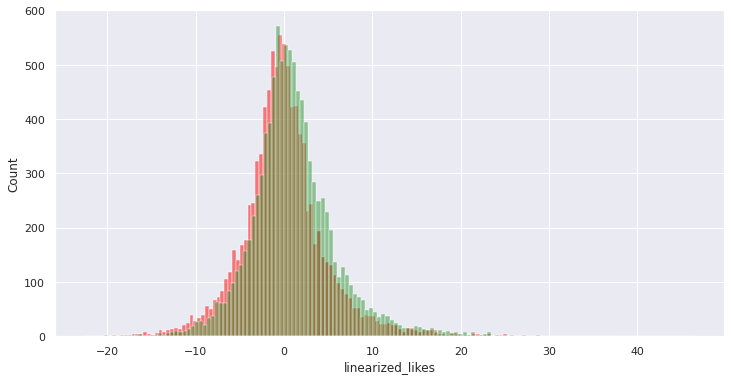

In [25]:
sns.set()
plt.figure(figsize = (12,6))
sns.histplot(cg1, x = 'linearized_likes', alpha = 0.5, kde=False, color="red")
sns.histplot(tg1, x = 'linearized_likes', alpha = 0.4, kde=False, color="green")

### GROUP 1,2

In [9]:
cg2['linearized_likes'] = cg2['likes'] - ctr_control_2*cg2['views']
tg2['linearized_likes'] = tg2['likes'] - ctr_control_2*tg2['views']

/tmp/ipykernel_48/1164081196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cg2['linearized_likes'] = cg2['likes'] - ctr_control_2*cg2['views']
/tmp/ipykernel_48/1164081196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg2['linearized_likes'] = tg2['likes'] - ctr_control_2*tg2['views']


In [11]:
stats.ttest_ind(cg2.linearized_likes,
                tg2.linearized_likes,
                equal_var=False) 

Ttest_indResult(statistic=6.122579994775972, pvalue=9.439432187037712e-10)

**p value стало "прокрашивать" различие.**

<AxesSubplot:xlabel='linearized_likes', ylabel='Count'>

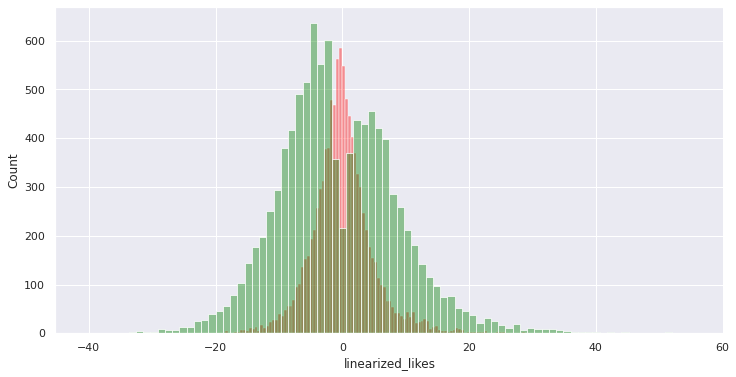

In [24]:
sns.set()
plt.figure(figsize = (12,6))
sns.histplot(cg2, x = 'linearized_likes', alpha = 0.4, kde=False, color="red")
sns.histplot(tg2, x = 'linearized_likes', alpha = 0.4, kde=False, color="green")

**Проанализировав результаты Т-теста по метрике линеаризованных лайков на группах обоих тестов, можно сделать вывод что данный тест показывает хорошие результаты как на нормализованных данных, так и на ненормализованных.**